<a href="https://colab.research.google.com/github/Shaurya2127/practice_projects/blob/main/Mall_Customer_Segmentation_Data.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans


In [4]:
df = pd.read_csv('Mall_Customers.csv')
print(df.info())
print(df.head())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Gender                  200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB
None
   CustomerID  Gender  Age  Annual Income (k$)  Spending Score (1-100)
0           1    Male   19                  15                      39
1           2    Male   21                  15                      81
2           3  Female   20                  16                       6
3           4  Female   23                  16                      77
4           5  Female   31                  17                      40


In [6]:
print(df.isnull().sum())

CustomerID                0
Gender                    0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64


<ipython-input-7-adff6e8ffbb4>:7: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[x] , bins = 20)
<ipython-input-7-adff6e8ffbb4>:7: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[x] , bins = 20)
<ipython-input-7-adff6e8ffbb4>:7: UserWarning: 

`distplot` is a deprecated function and will be r

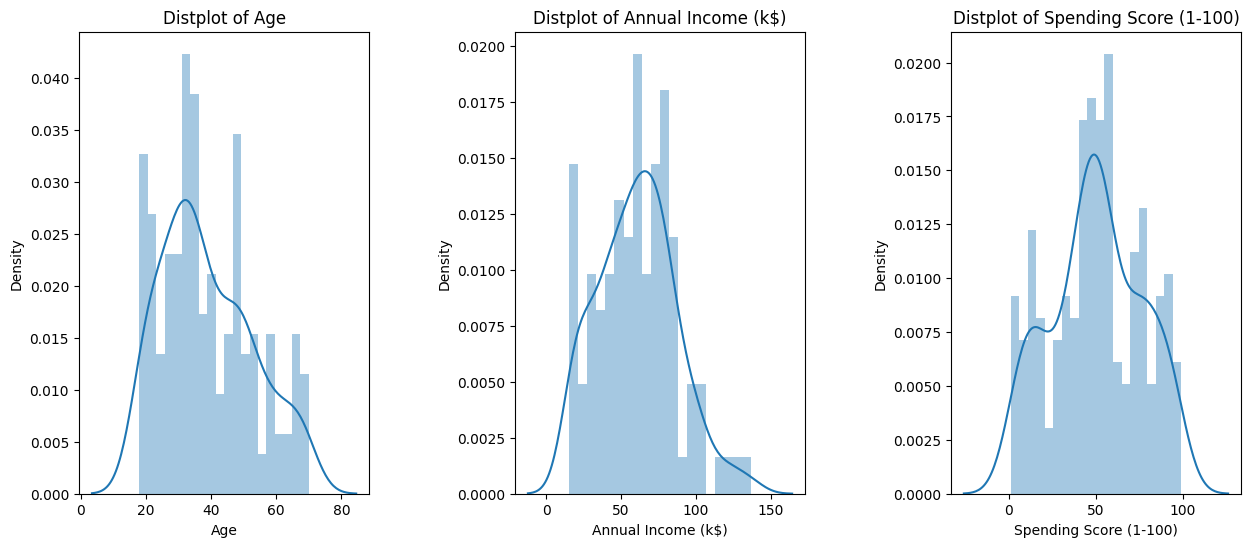

In [7]:
plt.figure(1 , figsize = (15 , 6))
n = 0
for x in ['Age' , 'Annual Income (k$)' , 'Spending Score (1-100)']:
    n += 1
    plt.subplot(1 , 3 , n)
    plt.subplots_adjust(hspace =0.5 , wspace = 0.5)
    sns.distplot(df[x] , bins = 20)
    plt.title('Distplot of {}'.format(x))
plt.show()


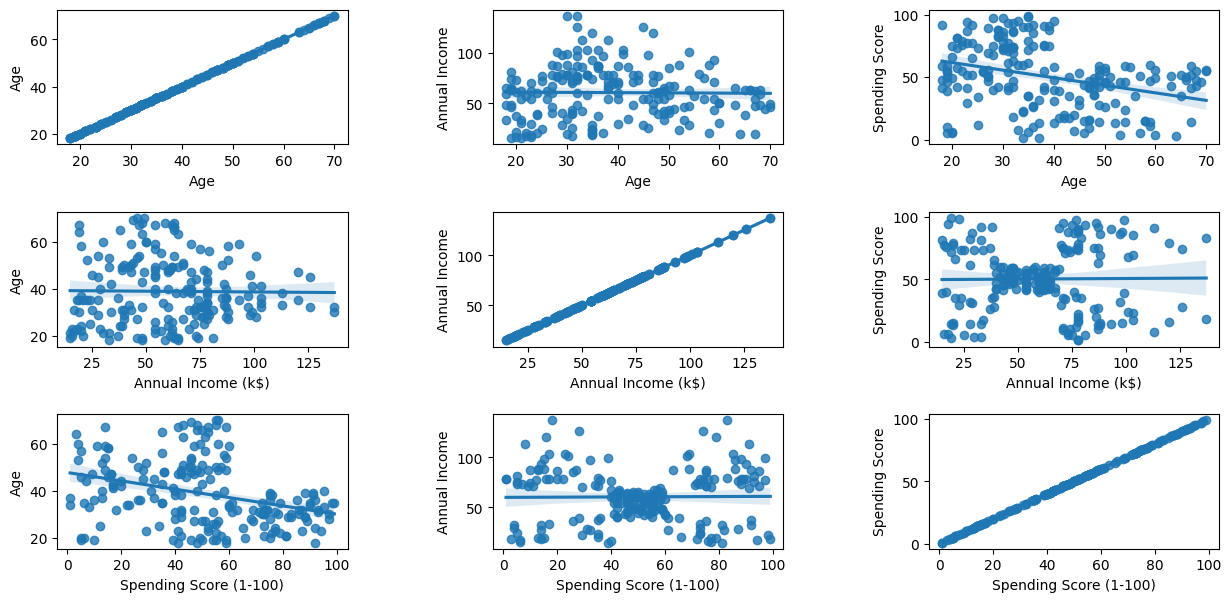

In [8]:
plt.figure(1 , figsize = (15 , 7))
n = 0
for x in ['Age' , 'Annual Income (k$)' , 'Spending Score (1-100)']:
    for y in ['Age' , 'Annual Income (k$)' , 'Spending Score (1-100)']:
        n += 1
        plt.subplot(3 , 3 , n)
        plt.subplots_adjust(hspace = 0.5 , wspace = 0.5)
        sns.regplot(x = x , y = y , data = df)
        plt.ylabel(y.split()[0]+' '+y.split()[1] if len(y.split()) > 1 else y )
plt.show()


In [9]:
X = df[['Annual Income (k$)', 'Spending Score (1-100)']]


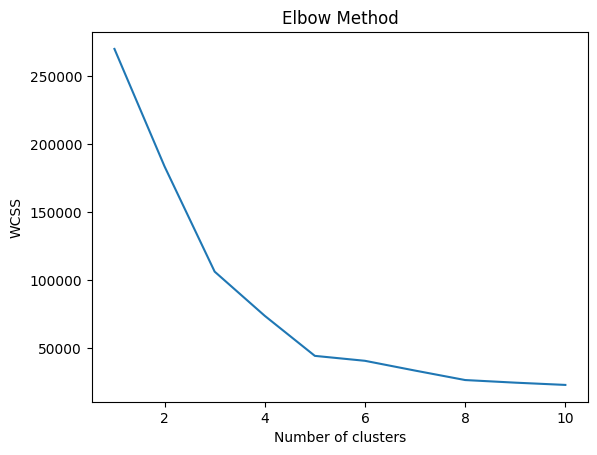

In [10]:
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, init='k-means++', random_state=42)
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)

plt.plot(range(1, 11), wcss)
plt.title('Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()


In [11]:
kmeans = KMeans(n_clusters=5, init='k-means++', random_state=42)
y_kmeans = kmeans.fit_predict(X)

# Add the result to your DataFrame
df['Cluster'] = y_kmeans


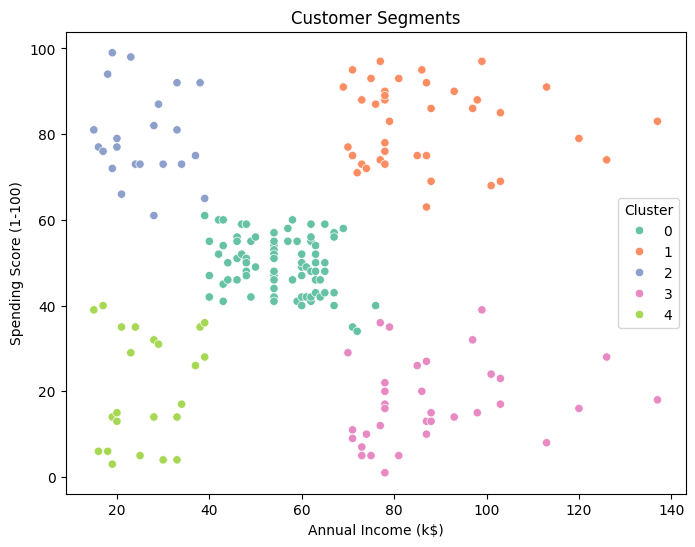

In [12]:
plt.figure(figsize=(8, 6))
sns.scatterplot(x='Annual Income (k$)', y='Spending Score (1-100)', hue='Cluster', data=df, palette='Set2')
plt.title('Customer Segments')
plt.show()


In [ ]:
# Analysis of Customer Segmentation

# Data Exploration:
# The code first explores the dataset, providing information about its structure (info()), initial rows (head()), and missing values (isnull().sum()).
# It then visualizes the distribution of 'Age', 'Annual Income', and 'Spending Score' using distplots. This reveals the skewness and central tendency of each variable.
# The code continues to analyze pairwise relationships between these three features using regplots, helping identify potential correlations.

# Determining Optimal Number of Clusters:
# The Elbow Method is applied to determine the optimal number of clusters for K-means clustering.
# It plots the Within-Cluster Sum of Squares (WCSS) against the number of clusters (1-10).
# The 'elbow point' in the graph indicates the point of diminishing returns for adding more clusters.

# K-Means Clustering:
# K-means clustering with 5 clusters (based on the Elbow Method) is performed using 'Annual Income' and 'Spending Score' as features.
# The cluster assignments are added as a new 'Cluster' column to the DataFrame.

# Visualization of Clusters:
# A scatterplot visualizes the customer segments created by the K-means algorithm.
# The plot displays 'Annual Income' vs. 'Spending Score', with each point colored according to its assigned cluster.
# This provides a clear visual representation of different customer groups based on their spending habits and income levels.

# Insights:
# The analysis identifies distinct customer segments based on income and spending habits.
# The clusters can reveal valuable insights about customer behavior. For instance:
#   - High income and high spending: These customers could be targeted with premium products or services.
#   - High income and low spending: Potential for upselling or introducing them to new products.
#   - Low income and high spending: Careful analysis of their creditworthiness and spending patterns might be needed.
#   - Low income and low spending: Promotional offers or value-driven marketing strategies could be effective.
# Further analysis could include demographic details, purchase history, or other relevant factors for a more refined segmentation.
